In [ ]:
%pip install pyarrow pandas

In [ ]:
%pip install lightgbm

In [ ]:
%pip install xgboost

In [ ]:
%pip install catboost

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import glob
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import catboost
from catboost import CatBoostRegressor

In [2]:
import os
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: c:\Users\felic\OneDrive\MicronDataChallenge


In [ ]:
# # List all Parquet files in a directory
# file_list = glob.glob("./train/metrology_data*.parquet")

# # Read and concatenate all Parquet files
# meas_df = pd.concat([pd.read_parquet(file) for file in file_list])

# # Save to a new Parquet file
# meas_df.to_parquet("meas_combined.parquet", index=False)

In [ ]:
# # List all Parquet files in a directory
# file_list = glob.glob("./train/run_data_*.parquet")

# # Read and concatenate all Parquet files
# run_df = pd.concat([pd.read_parquet(file) for file in file_list])

# # Save to a new Parquet file
# run_df.to_parquet("run_combined.parquet", index=False)

In [ ]:
# # List all Parquet files in a directory
# file_list = glob.glob("./train/incoming_run_data_*.parquet")

# # Read and concatenate all Parquet files
# incom_df = pd.concat([pd.read_parquet(file) for file in file_list])

# # Save to a new Parquet file
# incom_df.to_parquet("incom_run_combined.parquet", index=False)

In [130]:
meas_df      = pd.read_parquet("meas_combined.parquet")

In [4]:
incom_run_df  = pd.read_parquet("incom_run_combined.parquet")

In [5]:
run_df       = pd.read_parquet("run_combined.parquet")

# Exploratory Data Analysis

Gathering data on run_df, incoming_df and meas_df

In [6]:
df1 = run_df
df2 = incom_run_df
df3 = meas_df

In [ ]:
df1.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098


In [ ]:
df2.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:00.000000000,Sensor_1,202.660553
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:01.000000002,Sensor_1,202.660553
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:01.999999997,Sensor_1,202.660553
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_1,2023-12-31 00:00:03.000000000,Sensor_1,202.660553
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_1,2023-12-31 00:00:04.000000002,Sensor_1,202.660553


In [36]:
df3.head()

,Run ID,Run Start Time,Run End Time,X_index,Y_index,X,Y,Point Index,Measurement
0,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,23,-143.877551,-9.183673,3,10.006534
1,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,29,-143.877551,27.551020,48,10.002181
2,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,2,34,-137.755102,58.163265,43,10.031223
3,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,3,14,-131.632653,-64.285714,20,10.055888
4,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,5,39,-119.387755,88.775510,8,10.089505


In [23]:
df1.info()
print("Shape:", df1.shape)
print("Columns:", df1.columns.tolist())
print(df1.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41220750 entries, 0 to 41220749
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Tool ID          object        
 1   Run Start Time   datetime64[ns]
 2   Run End Time     datetime64[ns]
 3   Run ID           object        
 4   Process Step     object        
 5   Consumable Life  float32       
 6   Step ID          object        
 7   Time Stamp       datetime64[ns]
 8   Sensor Name      object        
 9   Sensor Value     float32       
 10  Time_utc         datetime64[ns]
dtypes: datetime64[ns](4), float32(2), object(5)
memory usage: 3.1+ GB
Shape: (41220750, 11)
Columns: ['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step', 'Consumable Life', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value', 'Time_utc']
Tool ID                    object
Run Start Time     datetime64[ns]
Run End Time       datetime64[ns]
Run ID                     object
Process

In [ ]:
#check number of null values

df1.isnull().sum()

Tool ID            0
Run Start Time     0
Run End Time       0
Run ID             0
Process Step       0
Consumable Life    0
Step ID            0
Time Stamp         0
Sensor Name        0
Sensor Value       0
Time_utc           0
dtype: int64

In [20]:
#check number of duplicated values

df1.duplicated().sum()

0

In [27]:
df1.describe(include='object')

# Value counts
for col in df1.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:\n", df1[col].value_counts())


Tool ID value counts:
 5116a75f-0543-502f-8278-2b2496d337d2    2253105
1914935a-df63-54c2-9c47-da905244e631    2251365
bb7e0385-0227-575a-9894-dacc8bf07f2a    2249430
683e5405-4b93-5160-be90-d3d5b0d9287a    2248140
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    2246790
db66ded5-0f4f-5179-b8e7-4673304ddff1    2244840
e4838ac1-3788-50bf-bbca-04cf339ec369    2244480
08e35986-3a0a-5274-8990-4ad303be9d5f    2241630
b3439d8e-290b-59a4-96a5-53348288f6a9    2241630
8060e8e1-504a-5138-a9f0-e2770bd61ba1    2235645
ac40636d-b491-5620-8d16-9aad56e5c4d3    2235450
a060c807-dbdb-5de3-9cd7-0c596234a3d7    2233815
d7291410-f34f-5cee-b3a1-0c60bb854423    2232780
ad28cd71-3811-543c-80a1-a440468a49d7    2231955
8a1010f8-7e9e-52ba-8586-2eac7e68eaee    2224380
30476bd4-f093-56c9-8cd1-23cf7f39ce5f    2219490
c7f536aa-a2fc-54b4-9b98-9f01793c9b5d    1798890
1b314ddd-198a-5cd5-90ae-933b947d013d    1795215
3cb39167-0519-578a-846d-7132592965d3    1791720
Name: Tool ID, dtype: int64

Run ID value counts:
 28eaf4dc-d95b

In [7]:
print('Number of Run ID:', df1["Run ID"].nunique())
print('Number of Tool ID:', df1["Tool ID"].nunique())
print('Number of Process Steps:', df1["Process Step"].nunique())
print('Number of Step ID:', df1["Step ID"].nunique())
print('Number of Sensor Name:', df1["Sensor Name"].nunique())

Number of Run ID: 4140
Number of Tool ID: 19
Number of Process Steps: 1
Number of Step ID: 13
Number of Sensor Name: 15


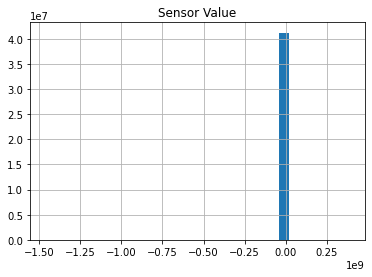

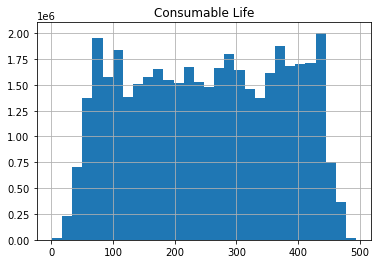

In [44]:
# Distribution plot for Sensor value and Consumable life

df1['Sensor Value'].hist(bins=30, label='Sensor Value')
plt.title('Sensor Value')
plt.show()

df1['Consumable Life'].hist(bins=30, label='Consumable Life')
plt.title('Consumable Life')
plt.show()

In [29]:
df2.info()
print("Shape:", df2.shape)
print("Columns:", df2.columns.tolist())
print(df2.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82896506 entries, 0 to 82896505
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Tool ID         object        
 1   Run Start Time  datetime64[ns]
 2   Run End Time    datetime64[ns]
 3   Run ID          object        
 4   Process Step    object        
 5   Step ID         object        
 6   Time Stamp      datetime64[ns]
 7   Sensor Name     object        
 8   Sensor Value    float32       
dtypes: datetime64[ns](3), float32(1), object(5)
memory usage: 5.2+ GB
Shape: (82896506, 9)
Columns: ['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value']
Tool ID                   object
Run Start Time    datetime64[ns]
Run End Time      datetime64[ns]
Run ID                    object
Process Step              object
Step ID                   object
Time Stamp        datetime64[ns]
Sensor Name               obje

In [30]:
#check number of null values

df2.isnull().sum()

Tool ID           0
Run Start Time    0
Run End Time      0
Run ID            0
Process Step      0
Step ID           0
Time Stamp        0
Sensor Name       0
Sensor Value      0
dtype: int64

In [21]:
#check number of duplicated values

df2.duplicated().sum()

0

In [34]:
df2.describe(include='object')

# Value counts
for col in df2.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:\n", df2[col].value_counts())


Tool ID value counts:
 8a1010f8-7e9e-52ba-8586-2eac7e68eaee    4663135
ac40636d-b491-5620-8d16-9aad56e5c4d3    4616887
1914935a-df63-54c2-9c47-da905244e631    4599790
a060c807-dbdb-5de3-9cd7-0c596234a3d7    4565186
db66ded5-0f4f-5179-b8e7-4673304ddff1    4557355
d7291410-f34f-5cee-b3a1-0c60bb854423    4528655
30476bd4-f093-56c9-8cd1-23cf7f39ce5f    4528286
5116a75f-0543-502f-8278-2b2496d337d2    4500365
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    4489500
08e35986-3a0a-5274-8990-4ad303be9d5f    4477282
8060e8e1-504a-5138-a9f0-e2770bd61ba1    4469164
b3439d8e-290b-59a4-96a5-53348288f6a9    4456946
683e5405-4b93-5160-be90-d3d5b0d9287a    4440628
bb7e0385-0227-575a-9894-dacc8bf07f2a    4422014
ad28cd71-3811-543c-80a1-a440468a49d7    4402908
e4838ac1-3788-50bf-bbca-04cf339ec369    4318858
c7f536aa-a2fc-54b4-9b98-9f01793c9b5d    3664211
1b314ddd-198a-5cd5-90ae-933b947d013d    3607508
3cb39167-0519-578a-846d-7132592965d3    3587828
Name: Tool ID, dtype: int64

Run ID value counts:
 e8f422bc-7dbe

In [8]:
print('Number of Run ID:', df2["Run ID"].nunique())
print('Number of Tool ID:', df2["Tool ID"].nunique())
print('Number of Process Steps:', df2["Process Step"].nunique())
print('Number of Step ID:', df2["Step ID"].nunique())
print('Number of Sensor Name:', df2["Sensor Name"].nunique())

Number of Run ID: 4140
Number of Tool ID: 19
Number of Process Steps: 1
Number of Step ID: 8
Number of Sensor Name: 41


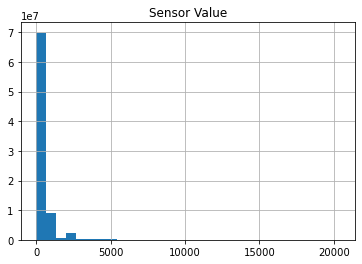

In [43]:
# Distribution plot for Sensor value and Consumable life

df2['Sensor Value'].hist(bins=30, label='Sensor Value')
plt.title('Sensor Value')
plt.show()

In [33]:
correlation = df1.corrwith(df2)
print(correlation)

Sensor Value       0.000046
Consumable Life         NaN
dtype: float64


In [37]:
df3.info()
print("Shape:", df3.shape)
print("Columns:", df3.columns.tolist())
print(df3.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202860 entries, 0 to 202859
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Run ID          202860 non-null  object        
 1   Run Start Time  202860 non-null  datetime64[ns]
 2   Run End Time    202860 non-null  datetime64[ns]
 3   X_index         202860 non-null  int32         
 4   Y_index         202860 non-null  int32         
 5   X               202860 non-null  float64       
 6   Y               202860 non-null  float64       
 7   Point Index     202860 non-null  int64         
 8   Measurement     202860 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int32(2), int64(1), object(1)
memory usage: 12.4+ MB
Shape: (202860, 9)
Columns: ['Run ID', 'Run Start Time', 'Run End Time', 'X_index', 'Y_index', 'X', 'Y', 'Point Index', 'Measurement']
Run ID                    object
Run Start Time    datetime64[ns]
Run End Time  

In [38]:
#check number of null values

df3.isnull().sum()

Run ID            0
Run Start Time    0
Run End Time      0
X_index           0
Y_index           0
X                 0
Y                 0
Point Index       0
Measurement       0
dtype: int64

In [39]:
#check number of duplicated values

df3.duplicated().sum()

0

In [40]:
df3.describe(include='object')

# Value counts
for col in df3.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:\n", df3[col].value_counts())


Run ID value counts:
 00862337-2cc0-5b34-b5e1-45588e935c39    49
cbc68e11-a0ea-5605-86aa-01d7f42ac0fc    49
a547c3de-e71b-53fb-aa49-4e2158ff10b9    49
a58d79fe-cc61-56b8-8037-789d9bfc33e3    49
a5c059e8-8555-5790-8fdd-30ab471e9235    49
                                        ..
54a4ee88-5377-58e3-b756-eb46fd9a6780    49
563fc9ee-06a7-5ff5-95a8-aff9b1dd566f    49
572064e4-52f8-5a4d-b1e6-d7aca1c5d228    49
5766e09c-13f0-5dc8-a866-91ebf6220c5a    49
fec7f5b4-aa67-550d-b1ab-9d9500dd40eb    49
Name: Run ID, Length: 4140, dtype: int64


In [ ]:
print('Number of Run ID:', df3["Run ID"].nunique())

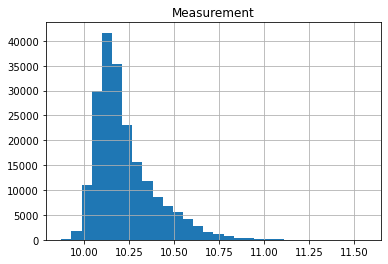

In [42]:
# Distribution plot for Sensor value and Consumable life

df3['Measurement'].hist(bins=30, label='Measurement')
plt.title('Measurement')
plt.show()

# Feature Plots



In [7]:
run_df['Time_utc'] = pd.to_datetime(run_df['Time Stamp'])
run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value,Time_utc
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105,2024-01-01 00:00:00.000000000
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894,2024-01-01 00:00:01.000000002
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357,2024-01-01 00:00:01.999999997
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941,2024-01-01 00:00:03.000000000
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098,2024-01-01 00:00:04.000000002


In [9]:
# You can choose the grouping column — often 'Run ID' or 'Tool ID'
group_col = 'Run ID'  # or 'Run ID' if available

# Standardize time by subtracting the start of each run
run_df['Relative Time'] = run_df.groupby(group_col)['Time Stamp'].transform(lambda x: (x - x.min()).dt.total_seconds())
run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value,Time_utc,Relative Time
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105,2024-01-01 00:00:00.000000000,0.0
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894,2024-01-01 00:00:01.000000002,1.0
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357,2024-01-01 00:00:01.999999997,2.0
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941,2024-01-01 00:00:03.000000000,3.0
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098,2024-01-01 00:00:04.000000002,4.0


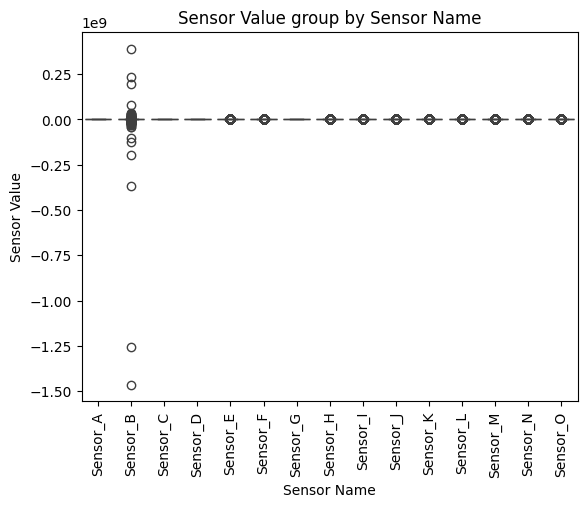

In [8]:
# Plot the graph of sensor value by sensor name
sns.boxplot(x='Sensor Name', y='Sensor Value', data=run_df)
plt.xticks(rotation=90)
plt.title(f'Sensor Value group by Sensor Name')

plt.show()

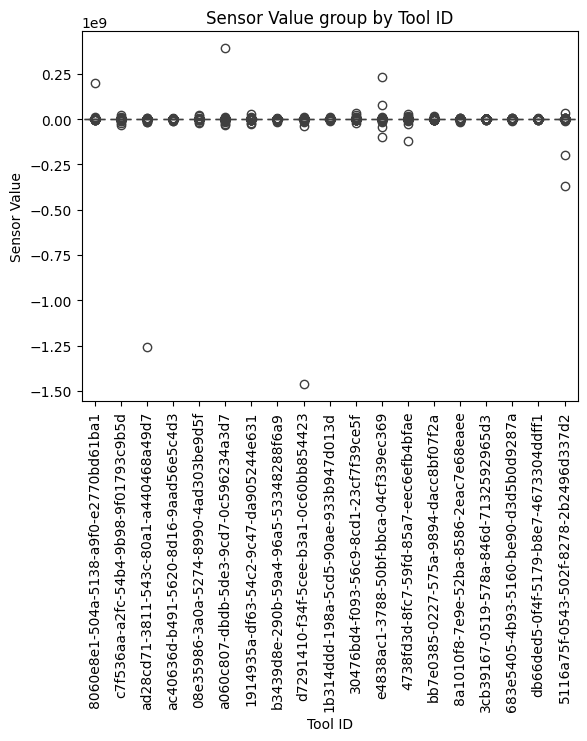

In [9]:
# Plot the graph of sensor value by tool id
sns.boxplot(x='Tool ID', y='Sensor Value', data=run_df)
plt.xticks(rotation=90)
plt.title(f'Sensor Value group by Tool ID')

plt.show()

In [10]:
mean_values = run_df.groupby('Tool ID')['Consumable Life'].mean()
print(mean_values)

Tool ID
08e35986-3a0a-5274-8990-4ad303be9d5f    243.836929
1914935a-df63-54c2-9c47-da905244e631    245.792709
1b314ddd-198a-5cd5-90ae-933b947d013d    255.029633
30476bd4-f093-56c9-8cd1-23cf7f39ce5f    257.020111
3cb39167-0519-578a-846d-7132592965d3    252.814621
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    242.962997
5116a75f-0543-502f-8278-2b2496d337d2    249.057816
683e5405-4b93-5160-be90-d3d5b0d9287a    256.124512
8060e8e1-504a-5138-a9f0-e2770bd61ba1    256.760284
8a1010f8-7e9e-52ba-8586-2eac7e68eaee    264.033264
a060c807-dbdb-5de3-9cd7-0c596234a3d7    241.627319
ac40636d-b491-5620-8d16-9aad56e5c4d3    251.713470
ad28cd71-3811-543c-80a1-a440468a49d7    236.826462
b3439d8e-290b-59a4-96a5-53348288f6a9    262.474304
bb7e0385-0227-575a-9894-dacc8bf07f2a    254.983871
c7f536aa-a2fc-54b4-9b98-9f01793c9b5d    256.201233
d7291410-f34f-5cee-b3a1-0c60bb854423    257.756073
db66ded5-0f4f-5179-b8e7-4673304ddff1    241.703156
e4838ac1-3788-50bf-bbca-04cf339ec369    253.091583
Name: Consumable Life, 

In [16]:
# for sensor in run_df['Tool ID'].unique():
#     subset_df = run_df[run_df['Tool ID'] == sensor]  # Filter data for each Run ID
    
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x='Consumable Life', y='Sensor Value', palette='coolwarm', data=subset_df)
#     plt.legend(title="Tool ID", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.title(f"Scatter Plot for {sensor}")

#     plt.show()

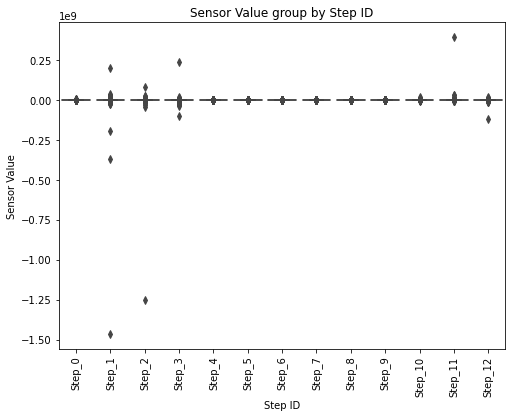

In [33]:
# Plot the graph of sensor value by step id
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.boxplot(x='Step ID', y='Sensor Value', data=run_df)
plt.xticks(rotation=90)
plt.title(f'Sensor Value group by Step ID')

plt.show()

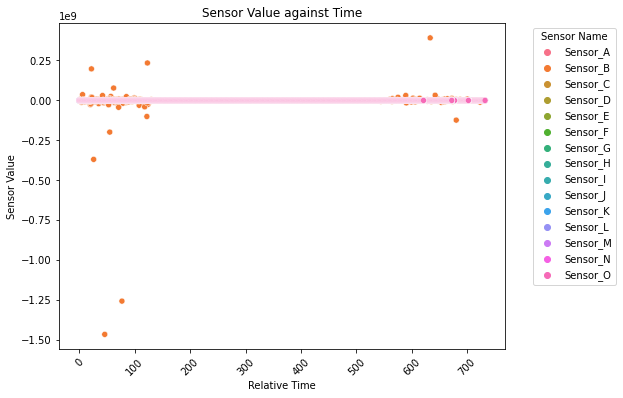

In [16]:
# Plot the graph with categorization
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.scatterplot(x='Relative Time', y='Sensor Value', hue='Sensor Name', data=run_df)

plt.title(f'Sensor Value against Time')
plt.legend(title="Sensor Name", bbox_to_anchor=(1.05, 1), loc='upper left')  # Ensure legend shows sensor categories
plt.xticks(rotation=45)  # Rotate timestamps for readability

# Show the plot
plt.show()

In [ ]:
# # for sensor in run_df['Tool ID'].unique():
# #     subset_df = run_df[run_df['Tool ID'] == sensor]  # Filter data for each Run ID
    
# #     plt.figure(figsize=(8, 6))
# #     sns.scatterplot(x='Time Stamp', y='Sensor Value', hue='Sensor Name', palette='coolwarm', data=subset_df)
# #     plt.legend(title="Step ID", bbox_to_anchor=(1.05, 1), loc='upper left')
# #     plt.title(f"Scatter Plot for {sensor}")
# #     plt.show()

# for sensor_name in run_df['Sensor Name'].unique():
#     subset_df = run_df[run_df['Sensor Name'] == sensor_name]
#     tool_ids = subset_df['Tool ID'].unique()

#     n_tools = len(tool_ids)
#     n_cols = 2  # Adjust this to fit your layout
#     n_rows = int(np.ceil(n_tools / n_cols))

#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), sharex=True)
#     axes = axes.flatten()

#     for i, tool_id in enumerate(tool_ids):
#         tool_df = subset_df[subset_df['Tool ID'] == tool_id]
#         ax = axes[i]

#         sns.scatterplot(x='Relative Time', y='Sensor Value', data=tool_df, ax=ax)
#         ax.set_title(f"Tool ID: {tool_id}")
#         ax.set_xlabel("Time Stamp")
#         ax.set_ylabel("Sensor Value")

#     # Hide unused axes
#     for j in range(i + 1, len(axes)):
#         axes[j].set_visible(False)

#     fig.suptitle(f"Scatter Plots for Sensor: {sensor_name}", fontsize=16)
#     plt.tight_layout(rect=[0, 0, 1, 0.97])
#     plt.show()

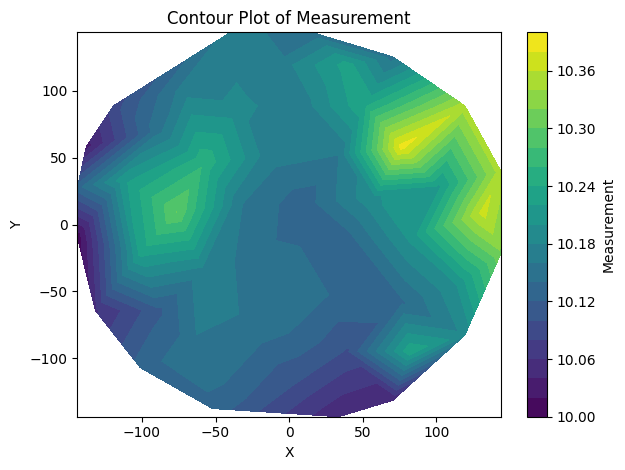

In [10]:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='X', y='Y', hue='Measurement', palette='coolwarm', data=meas_df)
# plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title(f"Scatter Plot")
# plt.show()

x = meas_df['X'].values
y = meas_df['Y'].values
z = meas_df['Measurement'].values

# Create triangulation
triang = tri.Triangulation(x, y)

# Plot contour
contour = plt.tricontourf(triang, z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Measurement')
plt.title('Contour Plot of Measurement')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()


# Aggregate features - sensor


In [112]:
# 2. Feature engineering on run_df
# 2a. Aggregate each sensor’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
sensor_feats = (
    run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
sensor_feats.columns = [
    f"{sensor}_{stat}" for sensor, stat in sensor_feats.columns
]
sensor_feats.reset_index(inplace=True)

In [113]:
# 3. Combine with measurement targets
df = meas_df.merge(sensor_feats, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [105]:
print(df.dtypes)

Run ID                    object
Run Start Time    datetime64[ns]
Run End Time      datetime64[ns]
X_index                    int32
Y_index                    int32
                       ...      
max_Sensor_K             float32
max_Sensor_L             float32
max_Sensor_M             float32
max_Sensor_N             float32
max_Sensor_O             float32
Length: 69, dtype: object


In [81]:
# # Create a categorical feature from 'run_type'
# df['Tool_ID_encoded'] = df['Tool ID'].astype('category').cat.codes
# df['Process_Step_encoded'] = df['Process Step'].astype('category').cat.codes
# df['Step_ID_encoded'] = df['Step ID'].astype('category').cat.codes

# Model training on run df dataset

In [114]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [115]:
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)

Datetime columns: ['Run Start Time', 'Run End Time']


In [116]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0436051	valid_1's rmse: 0.043966
[200]	training's rmse: 0.0367668	valid_1's rmse: 0.0373447
[300]	training's rmse: 0.033961	valid_1's rmse: 0.034676
[400]	training's rmse: 0.0321032	valid_1's rmse: 0.0329244
[500]	training's rmse: 0.030813	valid_1's rmse: 0.0317457
[600]	training's rmse: 0.0297515	valid_1's rmse: 0.0307946
[700]	training's rmse: 0.028972	valid_1's rmse: 0.0301459
[800]	training's rmse: 0.0282304	valid_1's rmse: 0.029526
[900]	training's rmse: 0.0276415	valid_1's rmse: 0.0290391
[1000]	training's rmse: 0.0270912	valid_1's rmse: 0.028593
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0270912	valid_1's rmse: 0.028593


# Model training on run df + incoming df dataset

In [117]:
#Add incoming run sensor values
agg_funcs = ["mean", "std", "min", "max"]
incoming_feats = (
    incom_run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
incoming_feats.columns = [
    f"{sensor}_incoming_{stat}" for sensor, stat in incoming_feats.columns
]
incoming_feats.reset_index(inplace=True)
feat = sensor_feats.merge(incoming_feats, on="Run ID")

In [118]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [119]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Datetime columns: ['Run Start Time', 'Run End Time']
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0393592	valid_1's rmse: 0.0398686
[200]	training's rmse: 0.0306085	valid_1's rmse: 0.0312978
[300]	training's rmse: 0.0272853	valid_1's rmse: 0.0280366
[400]	training's rmse: 0.0252458	valid_1's rmse: 0.0260901
[500]	training's rmse: 0.0239076	valid_1's rmse: 0.0248392
[600]	training's rmse: 0.0226871	valid_1's rmse: 0.0237139
[700]	training's rmse: 0.0217394	valid_1's rmse: 0.0228493
[800]	training's rmse: 0.0206175	valid_1's rmse: 0.0218135
[900]	training's rmse: 0.0197819	valid_1's rmse: 0.0210538
[1000]	training's rmse: 0.0191081	valid_1's rmse: 0.0204571
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0191081	valid_1's rmse: 0.0204571


# Feature engineering - run duration

In [135]:
# Create a 'run_duration' feature by calculating the difference between 'start_time_utc' and 'end_time_utc'
run_df['start_time_utc'] = pd.to_datetime(run_df['Run Start Time'])
run_df['end_time_utc'] = pd.to_datetime(run_df['Run End Time'])
run_df['run_duration'] = (run_df['end_time_utc'] - run_df['start_time_utc']).dt.total_seconds()

In [137]:
# Add the engineered run_duration feature
feat = sensor_feats.merge(run_df[['Run ID', 'run_duration']].drop_duplicates(), on='Run ID', how='left')

print("\nFeatures dataframe after engineering:")
print(feat.columns.tolist())


Features dataframe after engineering:
['Run ID', 'mean_Sensor_A', 'mean_Sensor_B', 'mean_Sensor_C', 'mean_Sensor_D', 'mean_Sensor_E', 'mean_Sensor_F', 'mean_Sensor_G', 'mean_Sensor_H', 'mean_Sensor_I', 'mean_Sensor_J', 'mean_Sensor_K', 'mean_Sensor_L', 'mean_Sensor_M', 'mean_Sensor_N', 'mean_Sensor_O', 'std_Sensor_A', 'std_Sensor_B', 'std_Sensor_C', 'std_Sensor_D', 'std_Sensor_E', 'std_Sensor_F', 'std_Sensor_G', 'std_Sensor_H', 'std_Sensor_I', 'std_Sensor_J', 'std_Sensor_K', 'std_Sensor_L', 'std_Sensor_M', 'std_Sensor_N', 'std_Sensor_O', 'min_Sensor_A', 'min_Sensor_B', 'min_Sensor_C', 'min_Sensor_D', 'min_Sensor_E', 'min_Sensor_F', 'min_Sensor_G', 'min_Sensor_H', 'min_Sensor_I', 'min_Sensor_J', 'min_Sensor_K', 'min_Sensor_L', 'min_Sensor_M', 'min_Sensor_N', 'min_Sensor_O', 'max_Sensor_A', 'max_Sensor_B', 'max_Sensor_C', 'max_Sensor_D', 'max_Sensor_E', 'max_Sensor_F', 'max_Sensor_G', 'max_Sensor_H', 'max_Sensor_I', 'max_Sensor_J', 'max_Sensor_K', 'max_Sensor_L', 'max_Sensor_M', 'max_Se

In [138]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [139]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Datetime columns: ['Run Start Time', 'Run End Time']
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0420681	valid_1's rmse: 0.0424774
[200]	training's rmse: 0.0357581	valid_1's rmse: 0.0363352
[300]	training's rmse: 0.0330078	valid_1's rmse: 0.0336914
[400]	training's rmse: 0.0313162	valid_1's rmse: 0.0321341
[500]	training's rmse: 0.0300465	valid_1's rmse: 0.0309523
[600]	training's rmse: 0.029046	valid_1's rmse: 0.0300476
[700]	training's rmse: 0.0282041	valid_1's rmse: 0.0293317
[800]	training's rmse: 0.0275182	valid_1's rmse: 0.0287393
[900]	training's rmse: 0.0268723	valid_1's rmse: 0.0282007
[1000]	training's rmse: 0.0263075	valid_1's rmse: 0.0277426
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0263075	valid_1's rmse: 0.0277426


# Feature engineering - Max Consumable Life

In [140]:
# 2b. Tool-life feature: max ConsumableLife per run
life_feat = (
    run_df
      .groupby("Run ID")["Consumable Life"]
      .max()
      .rename("ConsumableLifeMax")
      .reset_index()
)

# merge features
feat = sensor_feats.merge(life_feat, on="Run ID")

In [141]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [142]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Datetime columns: ['Run Start Time', 'Run End Time']
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0419525	valid_1's rmse: 0.0424026
[200]	training's rmse: 0.0356547	valid_1's rmse: 0.0362544
[300]	training's rmse: 0.0329959	valid_1's rmse: 0.0337093
[400]	training's rmse: 0.0313047	valid_1's rmse: 0.0321142
[500]	training's rmse: 0.0300533	valid_1's rmse: 0.0309591
[600]	training's rmse: 0.0290444	valid_1's rmse: 0.0300636
[700]	training's rmse: 0.0282327	valid_1's rmse: 0.0293817
[800]	training's rmse: 0.0275919	valid_1's rmse: 0.0288449
[900]	training's rmse: 0.0269603	valid_1's rmse: 0.0283201
[1000]	training's rmse: 0.0263676	valid_1's rmse: 0.0278421
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0263676	valid_1's rmse: 0.0278421


# Feature engineering - Tool ID

In [143]:
# 2. Feature engineering on run_df
# 2c. Aggregate each tool's time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
tool_feats = (
    run_df
      .groupby(["Run ID", "Tool ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
tool_feats.columns = [
    f"{tool}_tool_{stat}" for tool, stat in tool_feats.columns
]

tool_feats.reset_index(inplace=True)
feat = sensor_feats.merge(tool_feats, on="Run ID")

In [144]:
print(feat.columns.tolist())

['Run ID', 'mean_Sensor_A', 'mean_Sensor_B', 'mean_Sensor_C', 'mean_Sensor_D', 'mean_Sensor_E', 'mean_Sensor_F', 'mean_Sensor_G', 'mean_Sensor_H', 'mean_Sensor_I', 'mean_Sensor_J', 'mean_Sensor_K', 'mean_Sensor_L', 'mean_Sensor_M', 'mean_Sensor_N', 'mean_Sensor_O', 'std_Sensor_A', 'std_Sensor_B', 'std_Sensor_C', 'std_Sensor_D', 'std_Sensor_E', 'std_Sensor_F', 'std_Sensor_G', 'std_Sensor_H', 'std_Sensor_I', 'std_Sensor_J', 'std_Sensor_K', 'std_Sensor_L', 'std_Sensor_M', 'std_Sensor_N', 'std_Sensor_O', 'min_Sensor_A', 'min_Sensor_B', 'min_Sensor_C', 'min_Sensor_D', 'min_Sensor_E', 'min_Sensor_F', 'min_Sensor_G', 'min_Sensor_H', 'min_Sensor_I', 'min_Sensor_J', 'min_Sensor_K', 'min_Sensor_L', 'min_Sensor_M', 'min_Sensor_N', 'min_Sensor_O', 'max_Sensor_A', 'max_Sensor_B', 'max_Sensor_C', 'max_Sensor_D', 'max_Sensor_E', 'max_Sensor_F', 'max_Sensor_G', 'max_Sensor_H', 'max_Sensor_I', 'max_Sensor_J', 'max_Sensor_K', 'max_Sensor_L', 'max_Sensor_M', 'max_Sensor_N', 'max_Sensor_O', 'mean_tool_08e

In [145]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [146]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Datetime columns: ['Run Start Time', 'Run End Time']
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0419731	valid_1's rmse: 0.0423557
[200]	training's rmse: 0.0356027	valid_1's rmse: 0.0361797
[300]	training's rmse: 0.0329711	valid_1's rmse: 0.0336441
[400]	training's rmse: 0.0312856	valid_1's rmse: 0.0320542
[500]	training's rmse: 0.0301192	valid_1's rmse: 0.0309809
[600]	training's rmse: 0.0291384	valid_1's rmse: 0.0301056
[700]	training's rmse: 0.0283517	valid_1's rmse: 0.0294311
[800]	training's rmse: 0.0276755	valid_1's rmse: 0.0288779
[900]	training's rmse: 0.027037	valid_1's rmse: 0.028342
[1000]	training's rmse: 0.0264683	valid_1's rmse: 0.0278864
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0264683	valid_1's rmse: 0.0278864


# Feature engineering - Process Step

In [147]:
# 2. Feature engineering on run_df
# 2d. Aggregate each process's series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
proc_feats = (
    run_df
      .groupby(["Run ID", "Process Step"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
proc_feats.columns = [
    f"{proc}_proc_{stat}" for proc, stat in proc_feats.columns
]

proc_feats.reset_index(inplace=True)
feat = sensor_feats.merge(proc_feats, on="Run ID")

In [148]:
print(feat.columns.tolist())

['Run ID', 'mean_Sensor_A', 'mean_Sensor_B', 'mean_Sensor_C', 'mean_Sensor_D', 'mean_Sensor_E', 'mean_Sensor_F', 'mean_Sensor_G', 'mean_Sensor_H', 'mean_Sensor_I', 'mean_Sensor_J', 'mean_Sensor_K', 'mean_Sensor_L', 'mean_Sensor_M', 'mean_Sensor_N', 'mean_Sensor_O', 'std_Sensor_A', 'std_Sensor_B', 'std_Sensor_C', 'std_Sensor_D', 'std_Sensor_E', 'std_Sensor_F', 'std_Sensor_G', 'std_Sensor_H', 'std_Sensor_I', 'std_Sensor_J', 'std_Sensor_K', 'std_Sensor_L', 'std_Sensor_M', 'std_Sensor_N', 'std_Sensor_O', 'min_Sensor_A', 'min_Sensor_B', 'min_Sensor_C', 'min_Sensor_D', 'min_Sensor_E', 'min_Sensor_F', 'min_Sensor_G', 'min_Sensor_H', 'min_Sensor_I', 'min_Sensor_J', 'min_Sensor_K', 'min_Sensor_L', 'min_Sensor_M', 'min_Sensor_N', 'min_Sensor_O', 'max_Sensor_A', 'max_Sensor_B', 'max_Sensor_C', 'max_Sensor_D', 'max_Sensor_E', 'max_Sensor_F', 'max_Sensor_G', 'max_Sensor_H', 'max_Sensor_I', 'max_Sensor_J', 'max_Sensor_K', 'max_Sensor_L', 'max_Sensor_M', 'max_Sensor_N', 'max_Sensor_O', 'mean_proc_22c

In [149]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [150]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Datetime columns: ['Run Start Time', 'Run End Time']
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0421054	valid_1's rmse: 0.0425332
[200]	training's rmse: 0.0357002	valid_1's rmse: 0.0363375
[300]	training's rmse: 0.0329754	valid_1's rmse: 0.0337041
[400]	training's rmse: 0.0312496	valid_1's rmse: 0.0320979
[500]	training's rmse: 0.0299678	valid_1's rmse: 0.0309228
[600]	training's rmse: 0.028985	valid_1's rmse: 0.03005
[700]	training's rmse: 0.0282241	valid_1's rmse: 0.029412
[800]	training's rmse: 0.0275617	valid_1's rmse: 0.028875
[900]	training's rmse: 0.0269248	valid_1's rmse: 0.0283419
[1000]	training's rmse: 0.026331	valid_1's rmse: 0.0278597
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.026331	valid_1's rmse: 0.0278597


# Feature engineering - Step ID

In [151]:
# 2. Feature engineering on run_df
# 2e. Aggregate each step’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
step_feats = (
    run_df
      .groupby(["Run ID", "Step ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
step_feats.columns = [
    f"{step}_{stat}" for step, stat in step_feats.columns
]

step_feats.reset_index(inplace=True)
feat = sensor_feats.merge(step_feats, on="Run ID")

In [152]:
print(feat.columns.tolist())

['Run ID', 'mean_Sensor_A', 'mean_Sensor_B', 'mean_Sensor_C', 'mean_Sensor_D', 'mean_Sensor_E', 'mean_Sensor_F', 'mean_Sensor_G', 'mean_Sensor_H', 'mean_Sensor_I', 'mean_Sensor_J', 'mean_Sensor_K', 'mean_Sensor_L', 'mean_Sensor_M', 'mean_Sensor_N', 'mean_Sensor_O', 'std_Sensor_A', 'std_Sensor_B', 'std_Sensor_C', 'std_Sensor_D', 'std_Sensor_E', 'std_Sensor_F', 'std_Sensor_G', 'std_Sensor_H', 'std_Sensor_I', 'std_Sensor_J', 'std_Sensor_K', 'std_Sensor_L', 'std_Sensor_M', 'std_Sensor_N', 'std_Sensor_O', 'min_Sensor_A', 'min_Sensor_B', 'min_Sensor_C', 'min_Sensor_D', 'min_Sensor_E', 'min_Sensor_F', 'min_Sensor_G', 'min_Sensor_H', 'min_Sensor_I', 'min_Sensor_J', 'min_Sensor_K', 'min_Sensor_L', 'min_Sensor_M', 'min_Sensor_N', 'min_Sensor_O', 'max_Sensor_A', 'max_Sensor_B', 'max_Sensor_C', 'max_Sensor_D', 'max_Sensor_E', 'max_Sensor_F', 'max_Sensor_G', 'max_Sensor_H', 'max_Sensor_I', 'max_Sensor_J', 'max_Sensor_K', 'max_Sensor_L', 'max_Sensor_M', 'max_Sensor_N', 'max_Sensor_O', 'mean_Step_0',

In [153]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [154]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Datetime columns: ['Run Start Time', 'Run End Time']
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0385845	valid_1's rmse: 0.03903
[200]	training's rmse: 0.0329154	valid_1's rmse: 0.0335494
[300]	training's rmse: 0.0307654	valid_1's rmse: 0.0315609
[400]	training's rmse: 0.0293961	valid_1's rmse: 0.0303207
[500]	training's rmse: 0.0283966	valid_1's rmse: 0.0294416
[600]	training's rmse: 0.0275273	valid_1's rmse: 0.0287104
[700]	training's rmse: 0.02679	valid_1's rmse: 0.028126
[800]	training's rmse: 0.0261762	valid_1's rmse: 0.027639
[900]	training's rmse: 0.0255762	valid_1's rmse: 0.0271791
[1000]	training's rmse: 0.0250178	valid_1's rmse: 0.0267532
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0250178	valid_1's rmse: 0.0267532


# Feature engineering - Radius

In [155]:
# Create a 'radius' feature by calculating the distance between point to center of wafer
import math

def distance(row):
     return math.sqrt(row['X']**2 + row['Y']**2)

meas_df['radius'] = meas_df.apply(distance, axis = 1)

print(meas_df.head())

                                 Run ID      Run Start Time  \
0  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
1  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
2  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
3  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
4  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   

         Run End Time  X_index  Y_index           X          Y  Point Index  \
0 2024-01-02 04:58:00        1       23 -143.877551  -9.183673            3   
1 2024-01-02 04:58:00        1       29 -143.877551  27.551020           48   
2 2024-01-02 04:58:00        2       34 -137.755102  58.163265           43   
3 2024-01-02 04:58:00        3       14 -131.632653 -64.285714           20   
4 2024-01-02 04:58:00        5       39 -119.387755  88.775510            8   

   Measurement      radius  
0    10.006534  144.170349  
1    10.002181  146.491667  
2    10.031223  149.530711  
3    10.055888  146.491667  
4

C:\Users\felic\AppData\Local\Temp\ipykernel_32032\2899005474.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')


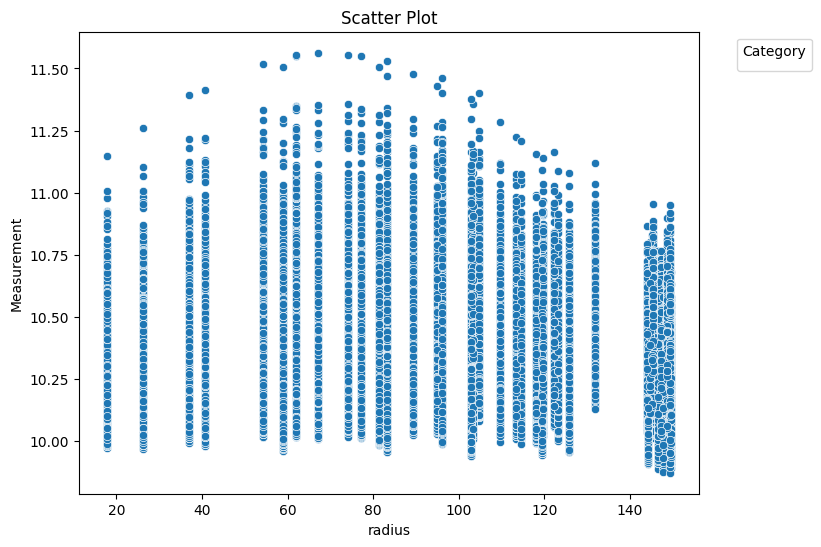

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius', y='Measurement', data=meas_df)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f"Scatter Plot")
plt.show()

In [156]:
# 3. Combine with measurement targets
df = meas_df.merge(sensor_feats, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [157]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Datetime columns: ['Run Start Time', 'Run End Time']
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0420681	valid_1's rmse: 0.0424774
[200]	training's rmse: 0.0357581	valid_1's rmse: 0.0363352
[300]	training's rmse: 0.0330078	valid_1's rmse: 0.0336914
[400]	training's rmse: 0.0313162	valid_1's rmse: 0.0321341
[500]	training's rmse: 0.0300465	valid_1's rmse: 0.0309523
[600]	training's rmse: 0.029046	valid_1's rmse: 0.0300476
[700]	training's rmse: 0.0282041	valid_1's rmse: 0.0293317
[800]	training's rmse: 0.0275182	valid_1's rmse: 0.0287393
[900]	training's rmse: 0.0268723	valid_1's rmse: 0.0282007
[1000]	training's rmse: 0.0263075	valid_1's rmse: 0.0277426
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0263075	valid_1's rmse: 0.0277426


# Feature engineering - angle

In [158]:
# Create a 'angle' feature
meas_df['theta'] = np.arctan2(meas_df['Y'], meas_df['X'])  # Radians
meas_df['theta_deg'] = np.degrees(meas_df['theta'])  # 0–360 degrees
meas_df['theta_deg'] = (meas_df['theta_deg'] + 360) % 360  # Final: [0, 360)

print(meas_df.head())

                                 Run ID      Run Start Time  \
0  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
1  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
2  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
3  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
4  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   

         Run End Time  X_index  Y_index           X          Y  Point Index  \
0 2024-01-02 04:58:00        1       23 -143.877551  -9.183673            3   
1 2024-01-02 04:58:00        1       29 -143.877551  27.551020           48   
2 2024-01-02 04:58:00        2       34 -137.755102  58.163265           43   
3 2024-01-02 04:58:00        3       14 -131.632653 -64.285714           20   
4 2024-01-02 04:58:00        5       39 -119.387755  88.775510            8   

   Measurement      radius     theta   theta_deg  
0    10.006534  144.170349 -3.077849  183.652223  
1    10.002181  146.491667  2.952394  169.15

In [159]:
# 3. Combine with measurement targets
df = meas_df.merge(sensor_feats, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [160]:

# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Datetime columns: ['Run Start Time', 'Run End Time']
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0420383	valid_1's rmse: 0.0424481
[200]	training's rmse: 0.0356481	valid_1's rmse: 0.0362328
[300]	training's rmse: 0.0329591	valid_1's rmse: 0.0336516
[400]	training's rmse: 0.0312377	valid_1's rmse: 0.0320598
[500]	training's rmse: 0.0300104	valid_1's rmse: 0.0309605
[600]	training's rmse: 0.0290037	valid_1's rmse: 0.0300674
[700]	training's rmse: 0.0281958	valid_1's rmse: 0.0293969
[800]	training's rmse: 0.0274843	valid_1's rmse: 0.0287979
[900]	training's rmse: 0.0268272	valid_1's rmse: 0.0282606
[1000]	training's rmse: 0.02623	valid_1's rmse: 0.0277587
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.02623	valid_1's rmse: 0.0277587


In [161]:
# meas_df['angle_bin'] = pd.cut(meas_df['theta_deg'], bins=12, labels=False)

# Model statistics

In [162]:
corr_matrix = df.corr(numeric_only=True)["Measurement"].sort_values(ascending=False)
print(corr_matrix)

Measurement      1.000000
mean_Sensor_N    0.755044
std_Sensor_N     0.752535
min_Sensor_N     0.749013
max_Sensor_N     0.741277
                   ...   
radius          -0.088230
theta_deg       -0.171080
std_Sensor_E    -0.200163
mean_Sensor_E   -0.201605
max_Sensor_E    -0.206962
Name: Measurement, Length: 69, dtype: float64


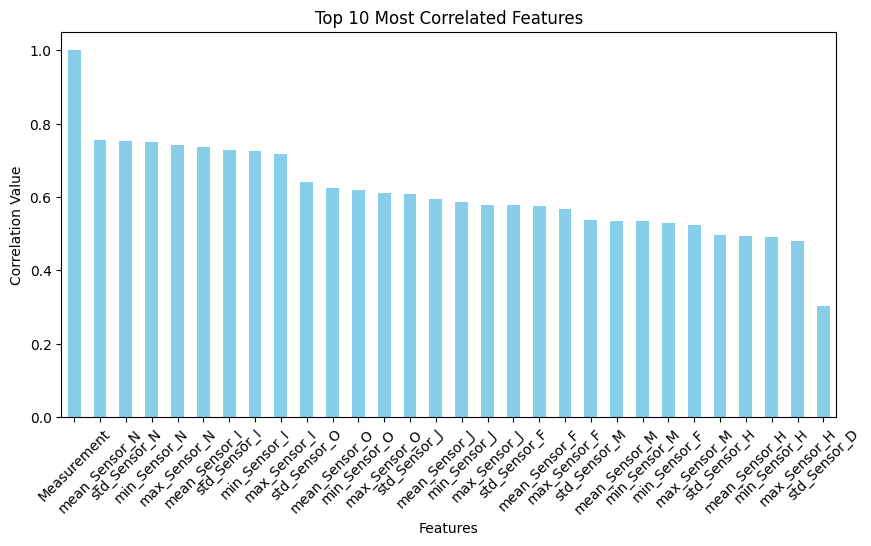

In [163]:
# Select top 30 most correlated features (excluding "Measurement" if needed)
top_10 = corr_matrix.nlargest(30)

# Plot bar chart
plt.figure(figsize=(10, 5))
top_10.plot(kind="bar", color="skyblue")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.title("Top 10 Most Correlated Features")
plt.xticks(rotation=45)
plt.show()

In [35]:
# for run_id in run_df['Run ID'].unique():
#     subset_df = meas_df[meas_df['Run ID'] == run_id]  # Filter data for each Run ID

#     sensor_name = 'mean_Sensor_N'

#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(data=subset_df, x=sensor_name, y='Measurement')
#     plt.title(f"Scatterplot of {sensor_name}")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# Model Comparison

Models tested:
1. Lightgbm
2. Random Forest
3. Xboost
4. Catboost

In [ ]:
# # 4. Train/validation split
# X = df.drop(columns=["Run ID", "Measurement"])
# y = df["Measurement"]
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

In [ ]:
# # Check for datetime columns
# datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
# print("Datetime columns:", list(datetime_cols))

# # Drop datetime columns from both train and val
# X_train = X_train.drop(columns=datetime_cols)
# X_test = X_test.drop(columns=datetime_cols)
# X = X.drop(columns=datetime_cols)

Datetime columns: ['Run Start Time', 'Run End Time']


In [ ]:
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

# params = {
#     "objective": "regression",
#     "metric": "rmse",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "learning_rate": 0.05,
#     "num_leaves": 31,
#     "feature_fraction": 0.9,
#     "bagging_fraction": 0.8,
#     "bagging_freq": 5,
# }

# lgb_model = lgb.train(
#     params,
#     lgb_train,
#     valid_sets=[lgb_train, lgb_val],
#     num_boost_round=1000,
#     callbacks=[
#         lgb.early_stopping(stopping_rounds=50),
#         lgb.log_evaluation(period=100)
#     ]
# )

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0341947	valid_1's rmse: 0.0346612
[200]	training's rmse: 0.0260171	valid_1's rmse: 0.0266078
[300]	training's rmse: 0.0231499	valid_1's rmse: 0.0237888
[400]	training's rmse: 0.021395	valid_1's rmse: 0.0221187
[500]	training's rmse: 0.0201823	valid_1's rmse: 0.0209932
[600]	training's rmse: 0.0192969	valid_1's rmse: 0.0201924
[700]	training's rmse: 0.0184081	valid_1's rmse: 0.0193893
[800]	training's rmse: 0.0176633	valid_1's rmse: 0.0187254
[900]	training's rmse: 0.0170621	valid_1's rmse: 0.0182005
[1000]	training's rmse: 0.0164161	valid_1's rmse: 0.0176256
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0164161	valid_1's rmse: 0.0176256


In [165]:
# 6. Evaluate on validation set
y_pred = lgb_model.predict(X_test)

val_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Validation RMSE: {val_rmse:.4f}")

Validation RMSE: 0.0278


In [166]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df

,Actual,Predicted
73554,10.078344,10.089874
140000,10.262311,10.232155
78039,10.278650,10.312206
68565,10.516511,10.499757
4904,10.272160,10.210401
...,...,...
106757,10.165335,10.144683
18042,10.283431,10.296572
40749,10.221261,10.252228
116080,10.291652,10.370327


In [167]:
result_df = X_test

In [168]:
result_df.head()

,X_index,Y_index,X,Y,Point Index,radius,theta,theta_deg,mean_Sensor_A,mean_Sensor_B,...,max_Sensor_F,max_Sensor_G,max_Sensor_H,max_Sensor_I,max_Sensor_J,max_Sensor_K,max_Sensor_L,max_Sensor_M,max_Sensor_N,max_Sensor_O
73554,6,30,-113.265306,33.673469,19,118.164851,2.852617,163.442929,0.000143,-297.231415,...,183.577850,86.601707,518.925964,452.806061,478.137451,21.718397,6.970377,1144.356445,1116.233276,1062.888428
140000,8,21,-101.020408,-21.428571,25,103.268129,-2.932570,191.976132,-0.002533,-9.216879,...,218.756165,94.101883,625.340698,471.250916,535.451904,26.182415,8.378400,1358.719727,1176.073853,1179.185181
78039,31,9,39.795918,-94.897959,27,102.904508,-1.173717,292.750976,0.000623,-99.556618,...,232.248138,95.310860,622.986145,545.873718,565.722168,21.767286,7.182114,1370.022705,1335.115845,1256.692993
68565,15,32,-58.163265,45.918367,11,74.104399,2.473303,141.709837,0.000233,-279.141266,...,234.843735,94.416145,600.645020,546.604614,575.759094,20.750326,6.247921,1328.529907,1339.991333,1278.631836
4904,5,39,-119.387755,88.775510,8,148.776770,2.502207,143.365886,-0.003017,201.786697,...,245.438873,93.784103,604.963623,560.675964,557.374939,18.804510,5.540261,1339.687134,1366.213623,1243.964111


In [169]:
result_df['Actual'] = y_test
result_df['Predicted'] = y_pred

In [170]:
result_df['abs_error'] = (result_df['Actual'] - result_df['Predicted']).abs()
result_df['squared_error'] = (result_df['Actual'] - result_df['Predicted']) ** 2

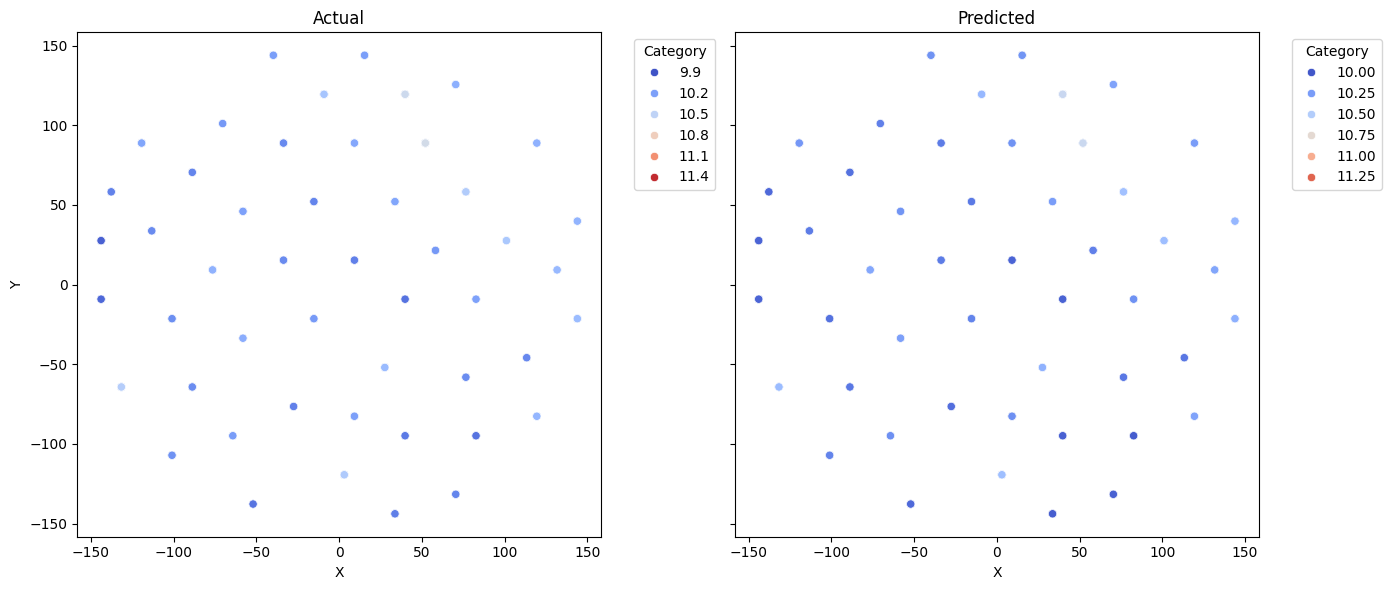

In [173]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot Actual
sns.scatterplot(ax=axes[0], x='X', y='Y', hue='Actual', palette='coolwarm', data=result_df)
axes[0].set_title('Actual')
axes[0].legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Predicted
sns.scatterplot(ax=axes[1], x='X', y='Y', hue='Predicted', palette='coolwarm', data=result_df)
axes[1].set_title('Predicted')
axes[1].legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout adjustment
plt.tight_layout()
plt.show()

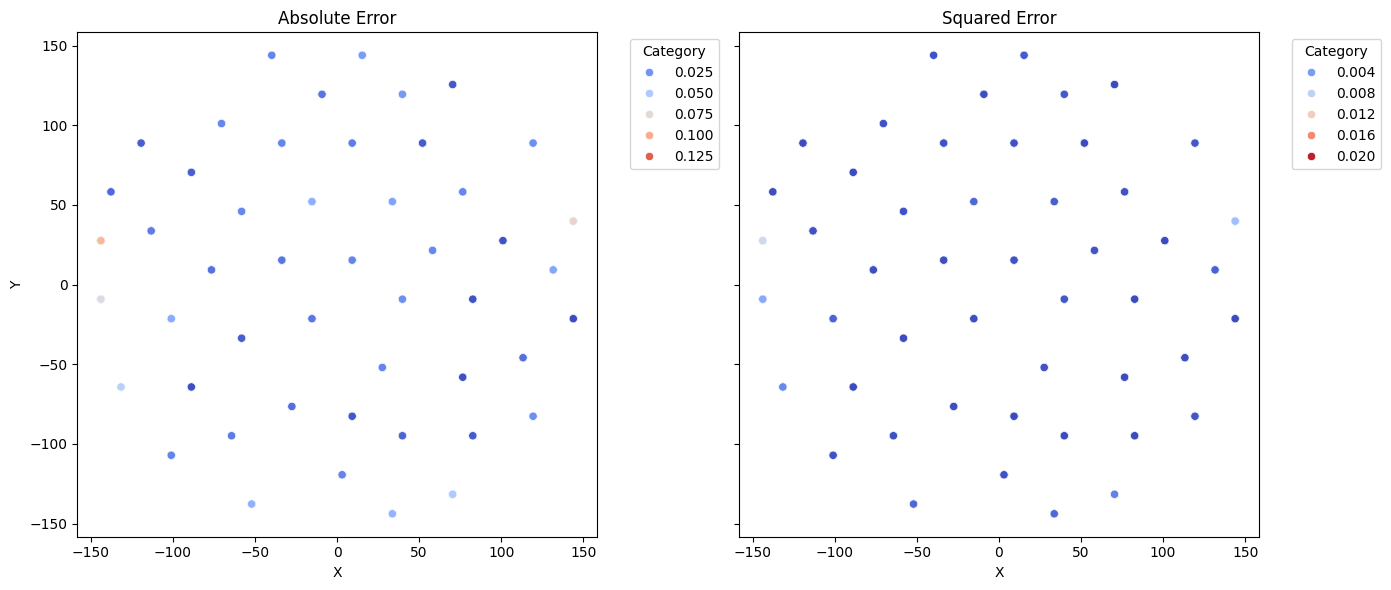

In [175]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot Actual
sns.scatterplot(ax=axes[0], x='X', y='Y', hue='abs_error', palette='coolwarm', data=result_df)
axes[0].set_title('Absolute Error')
axes[0].legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Predicted
sns.scatterplot(ax=axes[1], x='X', y='Y', hue='squared_error', palette='coolwarm', data=result_df)
axes[1].set_title('Squared Error')
axes[1].legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout adjustment
plt.tight_layout()
plt.show()

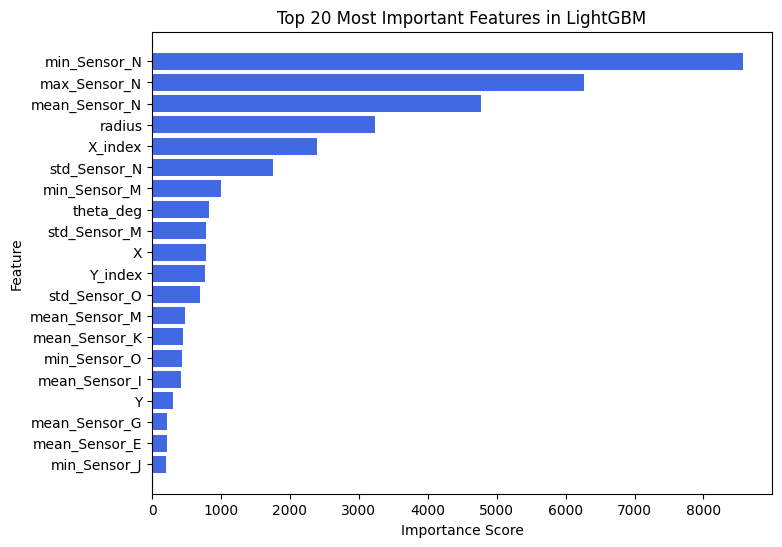

In [164]:
# Get feature importance scores
feature_importance = lgb_model.feature_importance(importance_type='gain')  # Or use 'split'
feature_names = lgb_model.feature_name()

# Create DataFrame for sorting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort and select top 10
top_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features in LightGBM")
plt.gca().invert_yaxis()  # Ensures highest importance is at the top
plt.show()

In [125]:
reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

In [126]:
# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Regression RMSE: {rmse:.4f}")

Regression RMSE: 0.0697


In [127]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.063186
140000,10.262311,10.232466
78039,10.278650,10.467647
68565,10.516511,10.481716
4904,10.272160,10.248366


In [129]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False)

# Train model
xgb_model.fit(X_train, y_train)

c:\Users\felic\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:30:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [130]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Regression RMSE: {rmse:.4f}")

Regression RMSE: 0.0408


In [131]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.098116
140000,10.262311,10.263518
78039,10.278650,10.339909
68565,10.516511,10.480553
4904,10.272160,10.245234


In [133]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [134]:
# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Regression RMSE: {rmse:.4f}")

Regression RMSE: 0.0797


In [135]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.100561
140000,10.262311,10.177456
78039,10.278650,10.354008
68565,10.516511,10.410074
4904,10.272160,10.357307


In [137]:
# Initialize CatBoost model
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Train the model
cat_model.fit(X_train, y_train)

In [139]:
# Predict
y_pred = cat_model.predict(X_test)

# Evaluate with RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"CatBoost Regression RMSE: {rmse:.4f}")

CatBoost Regression RMSE: 0.0330


In [140]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.099280
140000,10.262311,10.250333
78039,10.278650,10.333260
68565,10.516511,10.493247
4904,10.272160,10.234824


In [ ]:
# 7. Retrain on full dataset and prepare test submission
# (Assumes you have test_run_df & test_meas_df)
# test_sensor = (
#     test_run_df
#       .groupby(["RunId","SensorName"])["SensorValue"]
#       .agg(agg_funcs)
#       .unstack(fill_value=0)
# )
# test_sensor.columns = [f"{s}_{st}" for s, st in test_sensor.columns]
# test_sensor.reset_index(inplace=True)
# test_life = test_run_df.groupby("RunId")["ConsumableLife"].max().reset_index()
# test_feat = test_sensor.merge(test_life, on="RunId")
# test_df = test_meas_df.merge(test_feat, on="RunId", how="left")
#
# # retrain on all
# full_model = best_model.fit(X, y)
# test_pred   = full_model.predict(test_df.drop(columns=["RunId","X","Y"]))
#
# submission = test_df[["RunId","X","Y"]].copy()
# submission["Measurement"] = test_pred
# submission.to_csv("submission.csv", index=False)